In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import math 
from typing import List

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

# sklearn libraries
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# DATA VISUALIZATION AND EXPLORATION

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [4]:
# Shape of the dataset
print('The dataset has', df.shape[0],' rows and ', df.shape[1], 'columns.') 

The dataset has 253680  rows and  22 columns.


In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

COLUMNS LEGEND :

- Diabetes_binary : 0 = no diabetes 1 = diabetes

- HighBP : 0 = no high BP 1 = high BP

- HighChol : 0 = no high cholesterol 1 = high cholesterol

- CholCheck : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

- BMI : Body Mass Index

- Smoker : Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes

- Stroke : (Ever told) you had a stroke. 0 = no 1 = yes

- HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

- PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes

- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes

- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes

- HvyAlcoholConsump : (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

- AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 =   yes


- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1   = yes

- GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- MentHlth : days of poor mental health scale 1-30 days

- PhysHlth : physical illness or injury days in past 30 days scale 1-30

- DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

- Sex : 0 = female 1 = male

- Age : 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

- Education : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.

- Income : Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than  $35,000 8 = $75,000 or more


What can we extract from the legend?

Firstly it can be observed that the data is in a scale instead of being the actual value. The reason why some data is scaled is to preserve the privacy of the persons who's data is extracted from.

Then we realize that not all the scales are in the same range and for some it has an explanation, take for example all the categories that are either yes or no obviously it can just have 2 values 0 or 1. But then there are some features that the range is 1-30 like Physical Activity maybe for each day of the month the subject exercices? we did not find any reasonable explanation and there are other more subjective examples like General Health that goes 1 to 5 why that range? Again we did not find any logical solution to that.

Perhaps it is just convenient to have it ranges instead of large quantities of different values to work with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [8]:
df.max()

Diabetes_binary          1.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Sex                      1.0
Age                     13.0
Education                6.0
Income                   8.0
dtype: float64

Not all the variables are binary, so let's save the non-binary columns to then scale them. We will not scale the binary variables, so first we need to separate them.

In [9]:
non_binary_features = [
    'BMI',
    'GenHlth',
    'MentHlth',
    'PhysHlth',
    'Age',
    'Education',
    'Income'
]

In [10]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no NA values, so we don't have to deal with missing values.

In [11]:
df.duplicated().sum()

24206

There are 24206 duplicated observations.

In [12]:
df.shape

(253680, 22)

<AxesSubplot:>

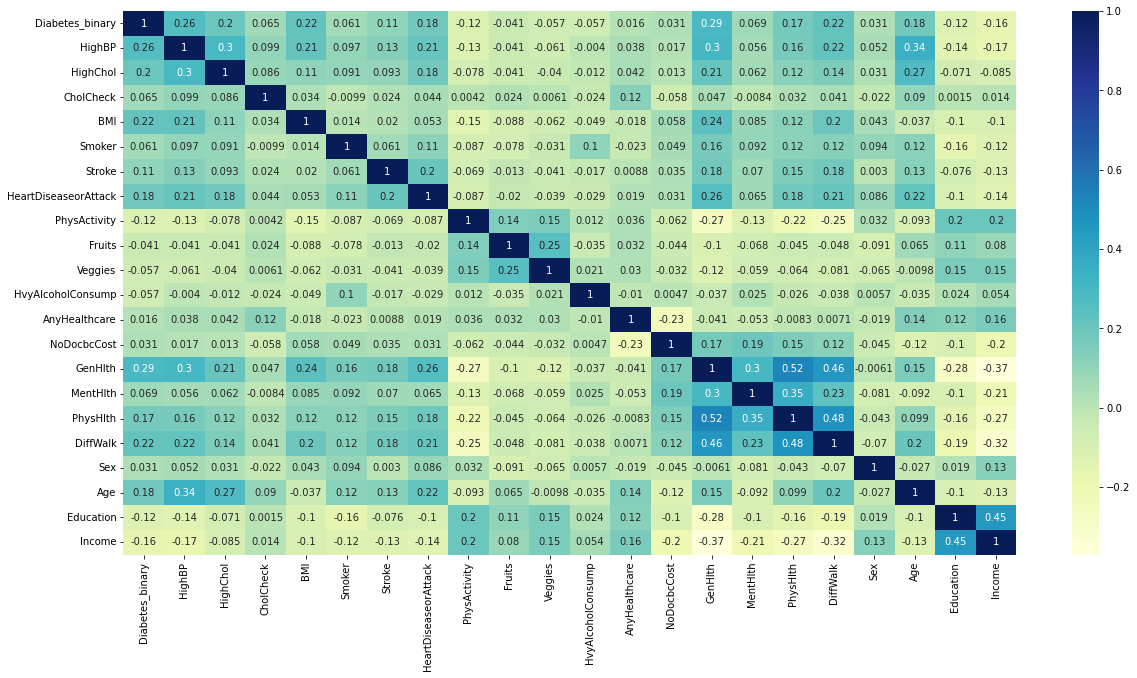

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [14]:
corr = np.abs(df.corr())
np.fill_diagonal(corr.values, 0) #Setting to zero correlations between the same variable (will have always value 1)
corr.max() > 0.6

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

This show us that is not necessary to do feature extraction because our features are not redundant (they are not highly correlated), so all of them are informative features. None of the variables have a correlation higher than 0.6.

# Exploration of some features

<AxesSubplot:>

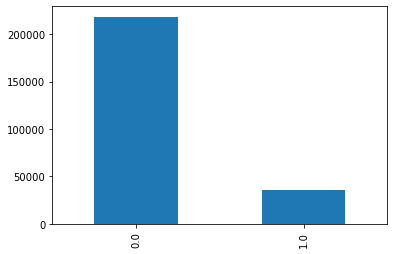

In [15]:
df['Diabetes_binary'].value_counts().plot(kind='bar')

In [16]:
df['Diabetes_binary'].value_counts(normalize=True)

0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64

Less than a 20% of our patients suffer diabetes.

<AxesSubplot:>

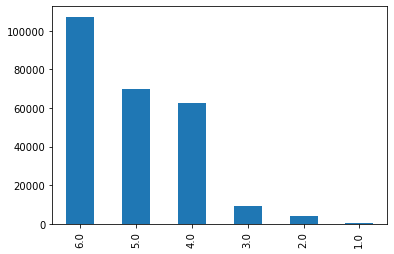

In [17]:
df['Education'].value_counts().plot(kind='bar')

In [18]:
df['Education'].value_counts(normalize=True)

6.0    0.423072
5.0    0.275583
4.0    0.247359
3.0    0.037362
2.0    0.015937
1.0    0.000686
Name: Education, dtype: float64

<AxesSubplot:xlabel='Diabetes_binary', ylabel='Education'>

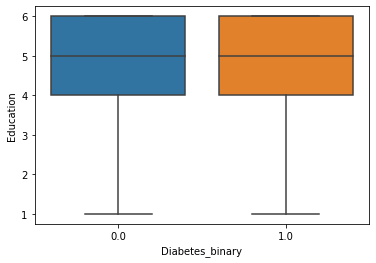

In [19]:
sns.boxplot(data=df, x="Diabetes_binary", y="Education")

Lots of our patients have a high education level, the majority are between level 6 and 4. The sns boxplot shows that the education variable does not discriminate in the output.

<AxesSubplot:>

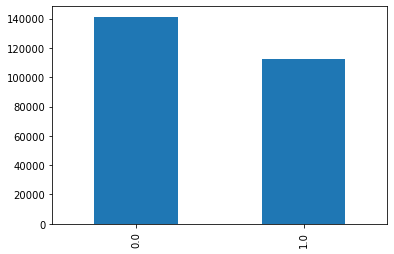

In [20]:
df['Smoker'].value_counts().plot(kind='bar')

In [21]:
df['Smoker'].value_counts(normalize=True)

0.0    0.556831
1.0    0.443169
Name: Smoker, dtype: float64

We have more no smokers than smokers. Even thought, we have a great number of smoker patients.

<AxesSubplot:>

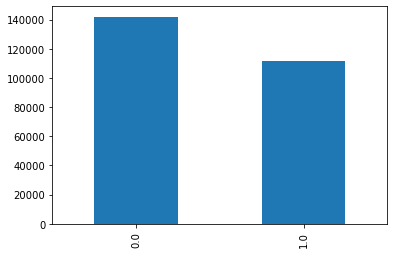

In [22]:
df['Sex'].value_counts().plot(kind='bar')

In [23]:
df['Sex'].value_counts(normalize=True)

0.0    0.559658
1.0    0.440342
Name: Sex, dtype: float64

More famale than male patients.

<AxesSubplot:>

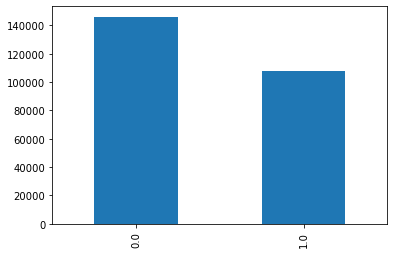

In [24]:
df['HighChol'].value_counts().plot(kind='bar')

In [25]:
df['HighChol'].value_counts(normalize=True)

0.0    0.575879
1.0    0.424121
Name: HighChol, dtype: float64

More than a 40% of our patients have high cholesterol.

(array([3.69200e+04, 1.75179e+05, 3.59430e+04, 4.28100e+03, 7.07000e+02,
        2.47000e+02, 3.19000e+02, 8.40000e+01]),
 array([12.  , 22.75, 33.5 , 44.25, 55.  , 65.75, 76.5 , 87.25, 98.  ]),
 <BarContainer object of 8 artists>)

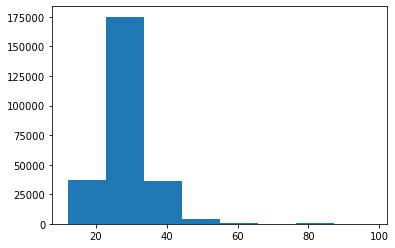

In [26]:
plt.hist(df['BMI'], bins=8)

In [27]:
df['BMI'].value_counts(normalize=True)

27.0    0.096996
26.0    0.081055
24.0    0.077066
25.0    0.067589
28.0    0.065220
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: BMI, Length: 84, dtype: float64

<AxesSubplot:xlabel='Diabetes_binary', ylabel='BMI'>

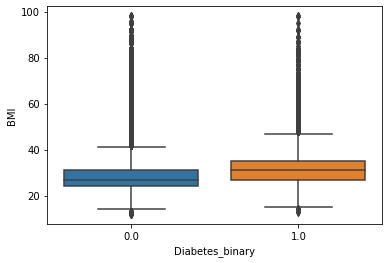

In [28]:
sns.boxplot(data=df, x="Diabetes_binary", y="BMI")

Most of our BMI values are between 10 and 40. The sns boxplot shows that as the logic tell us, patients with more BMI (mass body index) have more risk of suffering Diabetes. The BMI mean for diabetic patients (class 1) is higher than the BMI mean for non-diabetic patients (class 0). 

# CLASSIFIER MODELS

# Preprocessing before classifiers

In [29]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

The data is imbalanced, what will cause some problems in the classifier models. As wee can see, the minoritary class is the class 1 (Diabetic). The data is highly unbalanced because as we have seen before in the analysis of the features, more than 80% of our patients are from class 0 (non-diabetic). So, we expect to have problems by classifying the minoritary class (diabetic class). Going further, we expect to have a great number of False Negative patients, diabtetic (class 1) patients misclassified as non-diabetic (class 0) patients. This great number of False Negative patients will affect Recall (TP / (TP + FN)) causing its lower score and also will affect in a minor way to Precision (TP / TP + FP), because we will obtain a low number of True Positive patients (Diabetic patients well classified as Diabetic).

In [30]:
# Standarise only the non-binary variables
X = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']
binary_features = [col for col in X.columns if col not in non_binary_features]

sc = StandardScaler()
X_scaled_non_binary = sc.fit_transform(X[non_binary_features])
X_scaled_non_binary = pd.DataFrame(X_scaled_non_binary, columns=non_binary_features)
X_scaled_non_binary.index = X.index
X_scaled = pd.concat([X_scaled_non_binary, X[binary_features]], axis=1)
print(X_scaled.describe())

                BMI       GenHlth      MentHlth      PhysHlth           Age  \
count  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05   
mean  -8.566109e-17  3.318194e-14  1.857992e-14 -6.296298e-15  3.222375e-15   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.478916e+00 -1.414532e+00 -4.296296e-01 -4.865924e-01 -2.302431e+00   
25%   -6.631223e-01 -4.786188e-01 -4.296296e-01 -4.865924e-01 -6.653492e-01   
50%   -2.091739e-01 -4.786188e-01 -4.296296e-01 -4.865924e-01 -1.051636e-02   
75%    3.960906e-01  4.572943e-01 -1.598272e-01 -1.424742e-01  6.443165e-01   
max    1.053427e+01  2.329121e+00  3.617407e+00  2.954590e+00  1.626566e+00   

          Education        Income         HighBP       HighChol  \
count  2.536800e+05  2.536800e+05  253680.000000  253680.000000   
mean   2.219262e-14 -3.107282e-15       0.429001       0.424121   
std    1.000002e+00  1.000002e+00       0.494934       0.494210   
min   -4.108894e+00 

The describe shows how the non-binary features have been scaled while the binary ones have not.

In [31]:
# Split of our data 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y,
)

Let's plot the scatterplot of our training and test set with labels indacted by colors:

In [32]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

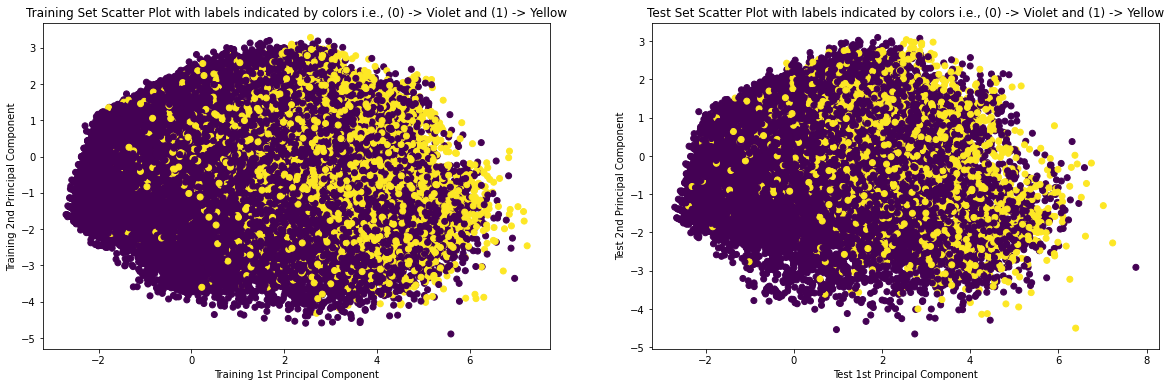

In [33]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In the plot we can clearly observe that the data is highly unbalanced, having more class 0 (violet) observations than class 1
(yellow) observations

Let's define a function to evaluate classifiers from confusion matrix:

In [34]:
def evaluation(cm):

    total= sum(sum(cm))

    # From confusion matrix calculate accuracy = (TP + TN) / All
    accuracy=(cm[1,1]+cm[0,0])/total
    print ('Accuracy : ', accuracy)

    # From confusion matrix calculate Precision = TP / (TP + FP)
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    print('Precision : ', precision)

    # From confusion matrix calculate sensitivity (Recall) = TP / (TP + FN)
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Sensitivity (Recall) : ', sensitivity)

    # From confusion matrix calculate specificity = TN / (FP + TN)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    print('Specificity : ', specificity)
    
    # Calculate the f1 score = 2 * (precision * recall) / (precision + recall)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    print('F1 score : ', f1)

Let's also define a function for plotting decision boundaries:

In [35]:
def plot_decision_boundaries2D(classifier, X_train_pca, X_test_pca, y_train, y_test):
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

    xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                     np.arange(y_min, y_max, 0.1))

    Z_train = classifier.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
    Z_train = Z_train.reshape(xx_train.shape)


    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

    xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                   np.arange(y_min, y_max, 0.1))

    Z_test = classifier.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
    Z_test = Z_test.reshape(xx_test.shape)


    plt.figure(figsize = (20, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(xx_train, yy_train, Z_train)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
    plt.xlabel('Training 1st Principal Component')
    plt.ylabel('Training 2nd Principal Component')
    plt.title('Scatter Plot with Decision Boundary for the Training Set')
    plt.subplot(1, 2, 2)
    plt.contourf(xx_test, yy_test, Z_test)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
    plt.xlabel('Test 1st Principal Component')
    plt.ylabel('Test 2nd Principal Component')
    plt.title('Scatter Plot with Decision Boundary for the Test Set')
    plt.show()


# Logistic regression classfier

First we will fit a logistic regression WITHOUT Grid Search in order to observe if our predictions done due to the imbalanced data are correct or not: 

In [36]:
clf_logreg_proof = LogisticRegression() 
clf_logreg_proof.fit(X_train, y_train)

LogisticRegression()

In [37]:
# calculate accuracy on the training set
clf_logreg_proof.score(X_train, y_train)

0.8638491406496374

 Let's plot the confusion matrix to evaluate:

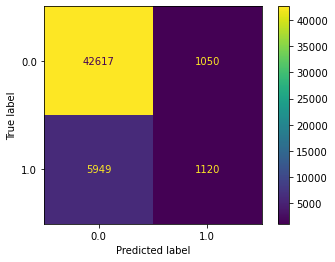

In [38]:
cm_logreg_proof = confusion_matrix(y_test, clf_logreg_proof.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_logreg_proof.predict(X_test))

In [39]:
evaluation(cm_logreg_proof)

Accuracy :  0.862050614947966
Precision :  0.5161290322580645
Sensitivity (Recall) :  0.1584382515207243
Specificity :  0.9759543820276181
F1 score :  0.24245048165385863


Now we can conclude that our first suppositions about the imbalanced data were true. We can observe how Specificity is very high due to the good classification done for the class 0 (non diabetic) and the low number of False Positive patients (patients from class 0 misclassified as class 1), because of the large number of initial data we have for class 0. Also Accuracy has a good score because as the majority of the observations are from class 0 and this class is well classified, the model in total takes that both classes will classify well. Otherwise, we can also confirm as it was expected that the Recall score is very low and that the Precision is low because of the small number of initial data we have for class 1 (imbalanced data). To solve this problem there are many methods, one of them is balancing the data. Even so, first we will try to fit more complex models with Grid Search setting as the scoring parameter the F1-SCORE (a metric measure that in its formula involves Precision and Recall). By this way we will try to get higher Precision and Recall scores in our models. We first prefer to perform this technique before starting to balance the data because we think that it is better to maintain the real data to provide the more realistic model. If this technique does not work well we will perform the balance of the data. 

In [40]:
# F1 SCORE = 2 * (precision * recall) / (precision + recall)

Let's perform the logistic regression with Grid Search and with F1 as scoring to find the best hyperparameters:

In [41]:
params_logreg = {'C':[0.01, 0.1, 1, 10, 100]}

model_log_reg = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = params_logreg, 
                        scoring= 'f1', 
                        cv = 3,
                        return_train_score=True,
                        verbose = 3)

model_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ........C=0.01;, score=(train=0.240, test=0.233) total time=   0.4s
[CV 2/3] END ........C=0.01;, score=(train=0.239, test=0.238) total time=   0.5s
[CV 3/3] END ........C=0.01;, score=(train=0.239, test=0.242) total time=   0.4s
[CV 1/3] END .........C=0.1;, score=(train=0.245, test=0.238) total time=   0.5s
[CV 2/3] END .........C=0.1;, score=(train=0.243, test=0.245) total time=   0.4s
[CV 3/3] END .........C=0.1;, score=(train=0.245, test=0.247) total time=   0.6s
[CV 1/3] END ...........C=1;, score=(train=0.245, test=0.239) total time=   0.5s
[CV 2/3] END ...........C=1;, score=(train=0.244, test=0.245) total time=   0.5s
[CV 3/3] END ...........C=1;, score=(train=0.245, test=0.247) total time=   0.6s
[CV 1/3] END ..........C=10;, score=(train=0.245, test=0.239) total time=   0.5s
[CV 2/3] END ..........C=10;, score=(train=0.244, test=0.246) total time=   0.4s
[CV 3/3] END ..........C=10;, score=(train=0.245,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='f1', verbose=3)

In [42]:
# Getting the best hyper-parameter
best_params_logreg = model_log_reg.best_params_

In [43]:
model_log_reg.best_params_

{'C': 100}

In [44]:
# Fitting the logistic regression with the best 
clf_logreg = LogisticRegression(**best_params_logreg).fit(X_train, y_train)

Let's evaluate the classifier with the best parameter found:

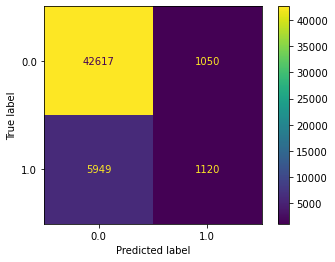

In [45]:
cm_logreg = confusion_matrix(y_test,clf_logreg.predict(X_test) )
ConfusionMatrixDisplay.from_predictions(y_test,clf_logreg.predict(X_test))

In [46]:
evaluation(cm_logreg)

Accuracy :  0.862050614947966
Precision :  0.5161290322580645
Sensitivity (Recall) :  0.1584382515207243
Specificity :  0.9759543820276181
F1 score :  0.24245048165385863


As logistic regression is a simple model and it only has one parameter to optimize, scarcely there are modifications in the metrics. 

Let's plot the decision boundary:

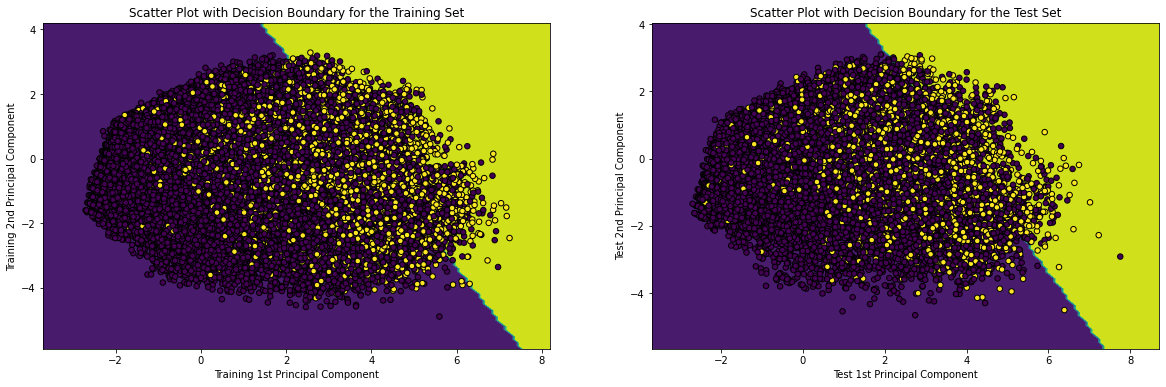

In [47]:
# Fitting the model with PCA components to do the plot:
clf_logreg_PCA = clf_logreg.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_logreg_PCA, X_train_pca, X_test_pca, y_train, y_test)

In the plot we can also observe the excessive number of True Negative patients, the yellow observations located in the violet region (diabetic patients misclassfied as non-diabetic). There are no signs of overfitting in the plot, so let's continue fitting other models.

# Naive Bayesian Gaussian classifier

In NB Gaussian classifier we cannot use Grid Search because there are not parameters to optimize.

In [48]:
clf_gauss = GaussianNB()
clf_gauss.fit(X_train, y_train)

GaussianNB()

In [49]:
# Calculate accuracy on the training set
clf_gauss.score(X_train, y_train)

0.7736616997792495

Let's plot the confusion matrix to evaluate:

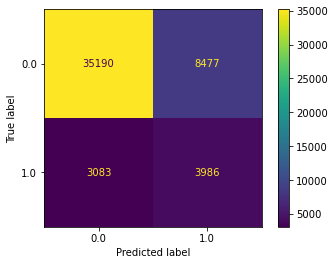

In [50]:
cm_gauss = confusion_matrix(y_test, clf_gauss.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_gauss.predict(X_test))

In [51]:
evaluation(cm_gauss)

Accuracy :  0.7721538946704509
Precision :  0.31982668699350075
Sensitivity (Recall) :  0.563870420144292
Specificity :  0.8058717109029702
F1 score :  0.4081507270120827


In NB Gaussian classifier the F1 score metric is increased, but the accuracy and Specificity are highly reduced, what does not interest us. We want to maximize F1 score without loosing too much Accuracy and Specificity. 

Let's plot the decision boundary:

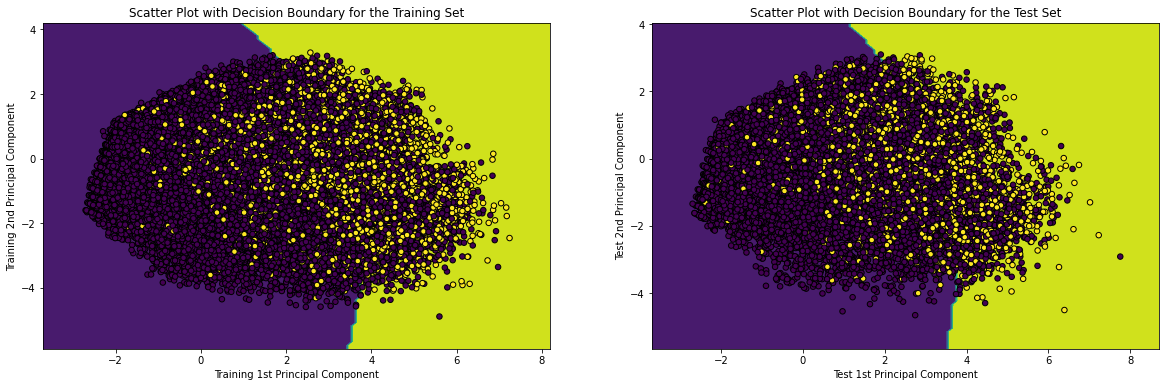

In [52]:
# Fitting the model with PCA components to do the plot:
clf_gauss_PCA = clf_gauss.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_gauss_PCA, X_train_pca, X_test_pca, y_train, y_test)

There are no signs of overfitting in the plot, so let's continue fitting other models.

# K-NN classifier

Let's fit a KNN classifier using Grid Search to optimize the number of neighbors and using F1 as scoring to maximize the Precision and Recall:

In [53]:
params_knn = {'n_neighbors':[1,20,50,100,200]}

model_knn = GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = params_knn, 
    scoring= 'f1', cv = 3,
    return_train_score=True,
    verbose = 10, n_jobs = -1)

model_knn.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 20, 50, 100, 200]},
             return_train_score=True, scoring='f1', verbose=10)

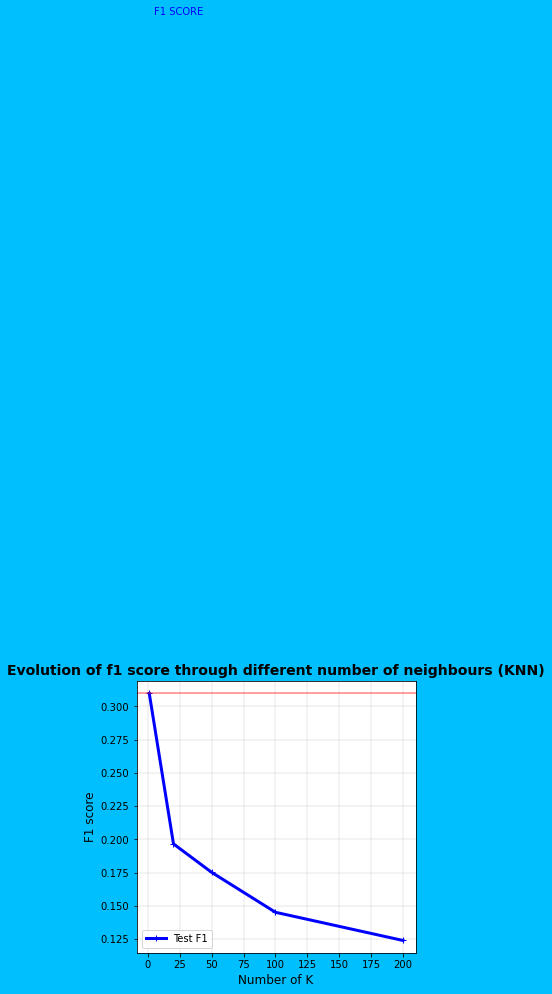

In [54]:
# Plotting results.

clf_knn_plot = KNeighborsClassifier()
clf_knn_plot.fit(X_train, y_train)
K_numbers=[1,20,50,100,200]

test_precision = []
test_recall = []

for X in K_numbers:
    clf_knn_plot.set_params(n_neighbors = X)
    clf_knn_plot.fit(X_train, y_train)
    pred = clf_knn_plot.predict(X_test)
    s = precision_score(y_test, pred)
    v = recall_score(y_test, pred)
    test_precision.append(s)
    test_recall.append(v)
    
f1=[]
for i,j in zip(test_precision, test_recall):
    f = (2 * (i * j) / (i + j))
    f1.append(f)
    
    
# Plotting results.

plt.figure(figsize=(5, 5),edgecolor='black', facecolor='deepskyblue')
plt.plot(K_numbers, f1, color = 'Blue', lw=3, marker='+', label='Test F1')
plt.title('Evolution of f1 score through different number of neighbours (KNN)', fontsize=14, fontweight='bold')
plt.xlabel('Number of K', fontsize=12)
plt.ylabel('F1 score', fontsize=12)
plt.legend(loc = 0)
plt.grid(True, lw=0.3)

#anotations
plt.text(5, 0.82, 'F1 SCORE', fontsize = 10, color ='Blue')
plt.axhline(y=max(f1), color='red', alpha=0.5) # Marks the best accuracy value.

plt.show()

Let's train the model with the best neighbors find by the Grid Search:

In [55]:
# Getting the best hyper-parameter
best_param_knn = model_knn.best_params_

In [56]:
model_knn.best_params_

{'n_neighbors': 1}

In [57]:
clf_knn = KNeighborsClassifier(**best_param_knn)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Let's plot the confusion matrix to evaluate:

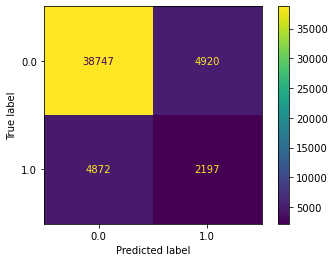

In [58]:
cm_knn = confusion_matrix(y_test, clf_knn.predict(X_test))
cm_knn_train = confusion_matrix(y_train, clf_knn.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, clf_knn.predict(X_test))

In [59]:
evaluation(cm_knn)

Accuracy :  0.8070009460737938
Precision :  0.30869748489532106
Sensitivity (Recall) :  0.31079360588484933
Specificity :  0.887329104357982
F1 score :  0.3097419991540956


Our Recall has been improved but not has much as we need. It also balanced the error between Recall and Precision giving them same score by having similar number of False Negative and False Positive. The number of FN and FP is too high because KNN is a simple model and there are not a lot of parameters to optimize.

Let's plot the decision boundary:

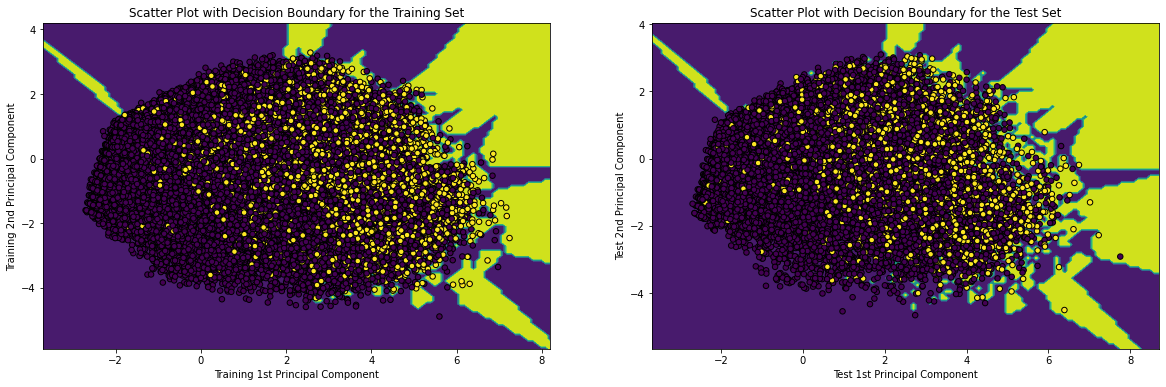

In [60]:
# Fitting the model with PCA components to do the plot:
clf_knn_PCA = clf_knn.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_knn_PCA, X_train_pca, X_test_pca, y_train, y_test)

In the plot we can clearly see how the model is overfitted, let's compare the train metrics with the test to confirm it:

In [61]:
evaluation(cm_knn_train)

Accuracy :  0.9934119757174393
Precision :  0.9763757249964634
Sensitivity (Recall) :  0.976341196025038
Specificity :  0.9961755798175957
F1 score :  0.9763584602054709


There is a big difference between the training metrics scores and the test metrics scores, what confirms the overfitting of the plot. This means that our model fits very well with the training data but, does not generalize well with different data. Let's continue fitting other classifiers.

# Decision tree classifier

We use Grid Search cross-validation to find the best parameters to fit our decision tree classifier and we use F1 as sccoring to maximize Precision and Recall:

In [62]:
params_decision_tree = {
    "criterion" : ['gini','entropy'],
    "max_depth" : [4, 6, 8],
    'min_samples_leaf': [0.001, 0.01, 0.05],
    'max_features' : ['auto', 'sqrt'],
}
model_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    scoring= 'f1',
    param_grid=params_decision_tree,
    cv=3, verbose=10, n_jobs=-1)

model_tree.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.01, 0.05]},
             scoring='f1', verbose=10)

In [63]:
# We print the best params
best_params_tree = model_tree.best_params_

In [64]:
model_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 0.001}

Now we train and evaluate the decision tree with the parameters found in the Grid Search: 

In [65]:
clf_tree = DecisionTreeClassifier(**best_params_tree)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=0.001)

Confusion matrix to evalute: 

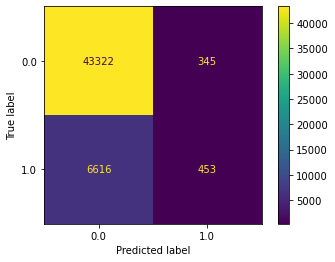

In [66]:
cm_tree = confusion_matrix(y_test, clf_tree.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_tree.predict(X_test))

In [67]:
evaluation(cm_tree)

Accuracy :  0.8627995900346894
Precision :  0.5676691729323309
Sensitivity (Recall) :  0.0640826142311501
Specificity :  0.9920992969519317
F1 score :  0.11516461166899708


Decision tree classifier is not a good model, we can see how it does not improve Precision or Recall. Let's continue trying with more complex models.

# ENSEMBLE LEARNING METHODS

# Voting

First we start with soft Voting classifier:

In [68]:
clf_voting_soft = VotingClassifier(estimators=[('lr', clf_logreg), ('nb', clf_gauss), ('dt', clf_tree), ('knn', clf_knn)], voting='soft')
clf_voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=100)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='auto',
                                                     min_samples_leaf=0.001)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))],
                 voting='soft')

We define a function to compare the f1 score of the different classifier methods:

In [69]:
def compare_classifiers_f1_score(clfs, X_train, X_test, y_train, y_test):
    for clf in clfs:
        clf.fit(X_train, y_train)
        print(f"{clf.__class__.__name__}:", f1_score(y_test, clf.predict(X_test)))

In [70]:
compare_classifiers_f1_score([clf_logreg, clf_gauss, clf_tree ,clf_knn, clf_voting_soft], X_train, X_test, y_train, y_test)

LogisticRegression: 0.24245048165385863
GaussianNB: 0.4081507270120827
DecisionTreeClassifier: 0.027939142461964037
KNeighborsClassifier: 0.3097419991540956
VotingClassifier: 0.3366068405011852


The soft voting classifier gets a very interesting F1 score.

Hard Voting classifier:

In [71]:
clf_voting_hard = VotingClassifier(estimators=[('lr', clf_logreg), ('nb', clf_gauss), ('dt', clf_tree), ('knn', clf_knn)], voting='hard')
clf_voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=100)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='auto',
                                                     min_samples_leaf=0.001)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))])

In [72]:
compare_classifiers_f1_score([clf_logreg, clf_gauss, clf_tree, clf_knn, clf_voting_hard], X_train, X_test, y_train, y_test)

LogisticRegression: 0.24245048165385863
GaussianNB: 0.4081507270120827
DecisionTreeClassifier: 0.10461852513396275
KNeighborsClassifier: 0.3097419991540956
VotingClassifier: 0.2178619756427605


The hard Voting classifier decreases the F1 score in comparison with the soft Voting classifier. So let's evaluate the soft one:

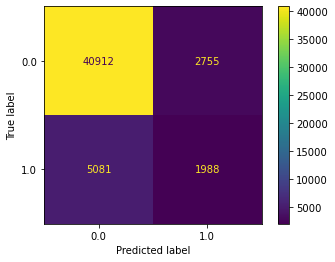

In [73]:
cm_voting_soft = confusion_matrix(y_test, clf_voting_soft.predict(X_test))
cm_voting_soft_train = confusion_matrix(y_train, clf_voting_soft.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, clf_voting_soft.predict(X_test))

In [74]:
evaluation(cm_voting_soft)

Accuracy :  0.8455534531693472
Precision :  0.4191440016866962
Sensitivity (Recall) :  0.2812278964492856
Specificity :  0.936908878558179
F1 score :  0.3366068405011852


As we expected, even thought the F1 score is higher than in other classifiers models, it isn't has higher as we need. Even thought, in comparison with other results, they are good metric values.

Let's plot the decision boundary: 

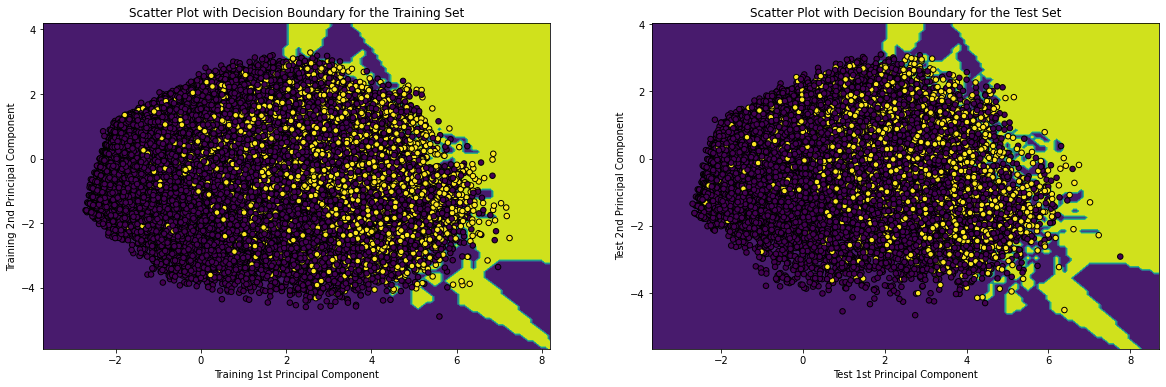

In [75]:
# Fitting the model with PCA components to do the plot:
clf_voting_soft_PCA = clf_voting_soft.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_voting_soft_PCA, X_train_pca, X_test_pca, y_train, y_test)

In this plot we are not sure about if the model is overfitted or not. So, let's evaluate the classifier in the train data to compare it with the test evalution and see if there is a lot of difference between the metrics.

In [76]:
evaluation(cm_voting_soft_train)

Accuracy :  0.9300496688741722
Precision :  0.8776484471383361
Sensitivity (Recall) :  0.5786328111185769
Specificity :  0.9869408646166706
F1 score :  0.6974424552429669


The train metrics confirm the overfitting. There is a lot of difference between the Precision, Sensitivity and F1 score of the training data and the test data. This means that the model does not generalize well to new data. Let's continue fitting other classifiers. 

# Bagging

Let's perform Grid Search to found the best parameters to train a Bagging classification model with F1 as scoring to maximize Precision and Recall:

In [77]:
params_bagging = {'bootstrap_features': [False, True],
          'max_samples': [0.50, 0.75],
          'n_estimators': [50, 100, 250]
}
model_bagg = GridSearchCV(
    BaggingClassifier(base_estimator=DecisionTreeClassifier(**best_params_tree)),
    scoring= 'f1', param_grid=params_bagging, cv=3, verbose=2, n_jobs=-1)

model_bagg.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=8,
                                                                               max_features='auto',
                                                                               min_samples_leaf=0.001)),
             n_jobs=-1,
             param_grid={'bootstrap_features': [False, True],
                         'max_samples': [0.5, 0.75],
                         'n_estimators': [50, 100, 250]},
             scoring='f1', verbose=2)

In [78]:
#We print the best params
best_params_bag = model_bagg.best_params_

In [79]:
model_bagg.best_params_

{'bootstrap_features': False, 'max_samples': 0.75, 'n_estimators': 100}

In [80]:
clf_bagg = BaggingClassifier(**best_params_bag)
clf_bagg.fit(X_train, y_train)

BaggingClassifier(max_samples=0.75, n_estimators=100)

Let's plot the confusion matrix to evaluate:

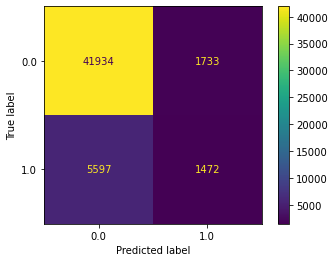

In [81]:
cm_bagging = confusion_matrix(y_test, clf_bagg.predict(X_test))
cm_bagging_train = confusion_matrix(y_train, clf_bagg.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, clf_bagg.predict(X_test))

In [82]:
evaluation(cm_bagging)  

Accuracy :  0.8555266477451908
Precision :  0.4592823712948518
Sensitivity (Recall) :  0.2082331305700948
Specificity :  0.9603132800512973
F1 score :  0.2865485692038155


As in other models we improve Recall but in a very low rate. So, even the other metrics are quite good we need a higher Recall score.

Let's plot the decision boundary:

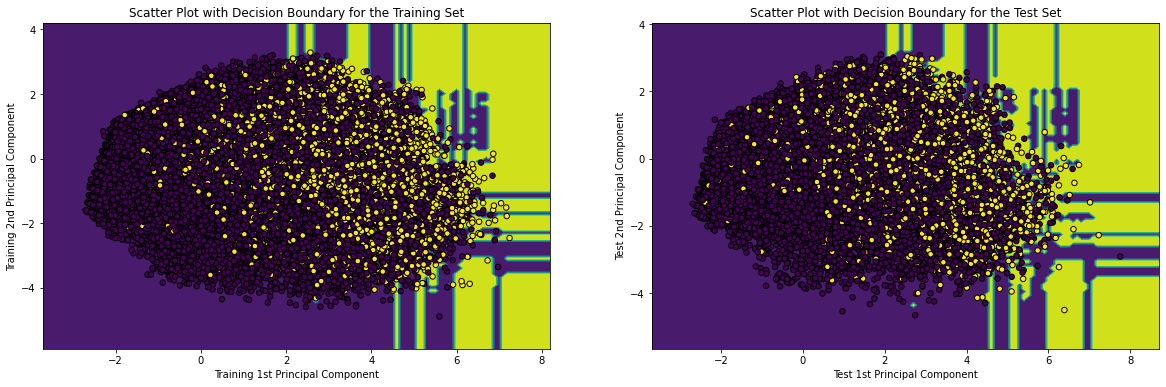

In [83]:
# Fitting the model with PCA components to do the plot:
clf_bagg_PCA = clf_bagg.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_bagg_PCA, X_train_pca, X_test_pca, y_train, y_test)

In the plot we can clearly see how the model is overfitted, let's compare the train metrics with the test to confirm it:

In [84]:
evaluation(cm_bagging_train)

Accuracy :  0.9908398375906654
Precision :  0.9964296452194829
Sensitivity (Recall) :  0.937617144675885
Specificity :  0.9994561079081911
F1 score :  0.9661291791928578


There is a big difference between the training metrics scores and the test metrics scores, what confirms the overfitting. This means that our model does not generalize well to new data. Let's continue fitting other classifiers.

# Random Forest

Let's first fit a Random Forest classifier with the best parameters found by the grid search and with F1 as scoring to maximize Precision and Recall:

In [85]:
params_rf = {
             'n_estimators':[50, 100, 250],
             'min_samples_leaf': [0.001, 0.01, 0.05],
             'max_depth':[5, 7],
             'bootstrap':[True,False] #True means random forest using bagging, False means random forest using pasting
}
model_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced'), 
    scoring='f1', param_grid=params_rf, cv=3, 
    verbose=10, n_jobs=-1)

model_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7],
                         'min_samples_leaf': [0.001, 0.01, 0.05],
                         'n_estimators': [50, 100, 250]},
             scoring='f1', verbose=10)

In [86]:
#We print the best params
best_params_rf = model_rf.best_params_
model_rf.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 0.001,
 'n_estimators': 50}

In [87]:
clf_rf = RandomForestClassifier(**best_params_rf) 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=0.001, n_estimators=50)

Let's plot the confusion matrix to evaluate the classifier:

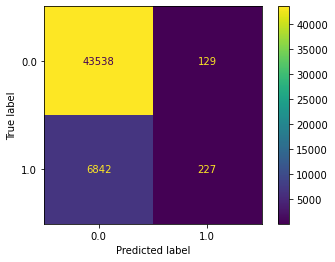

In [88]:
cm_rf = confusion_matrix(y_test, clf_rf.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_rf.predict(X_test))

In [89]:
evaluation(cm_rf)

Accuracy :  0.8626024913276569
Precision :  0.6376404494382022
Sensitivity (Recall) :  0.032112038477861087
Specificity :  0.9970458240776788
F1 score :  0.061144781144781155


We observe that the Precision has increased and all the scores are good except Recall that has been highly decreased. The Recall, as the F1 score is very low, so is not a useful model. Let's continue proving other models

# BOOSTING CLASSIFIERS

# AdaBoost

Let's first fit an AdaBoost classifier with the best parameters found by the Grid Search and with F1 as scoring to maximize Precision and Recall:

In [90]:
params_adaboost = {
             'n_estimators':[50, 100, 250, 500],
             'learning_rate':[0.001, 0.01, 0.1]
}
model_adaboost = GridSearchCV(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(**best_params_tree)),
    scoring='f1', param_grid=params_adaboost, cv=3, verbose=10, n_jobs=-1)

model_adaboost.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=8,
                                                                                max_features='auto',
                                                                                min_samples_leaf=0.001)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='f1', verbose=10)

In [91]:
#We print the best params
best_params_adaboost = model_adaboost.best_params_
model_adaboost.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [92]:
clf_adaboost = AdaBoostClassifier(**best_params_adaboost) 
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

Let's plot the confusion matrix to evaluate the classifier:

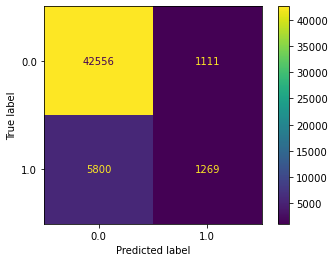

In [93]:
cm_adaboost = confusion_matrix(y_test, clf_adaboost.predict(X_test))
cm_adaboost_train = confusion_matrix(y_train, clf_adaboost.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, clf_adaboost.predict(X_test))

In [94]:
evaluation(cm_adaboost)

Accuracy :  0.8637850835698517
Precision :  0.5331932773109244
Sensitivity (Recall) :  0.1795161974819635
Specificity :  0.9745574461263654
F1 score :  0.26859985183617313


The metrics are not bad, Precision has been increased but Recall score has to be higher.

Let's plot the decision boundary:

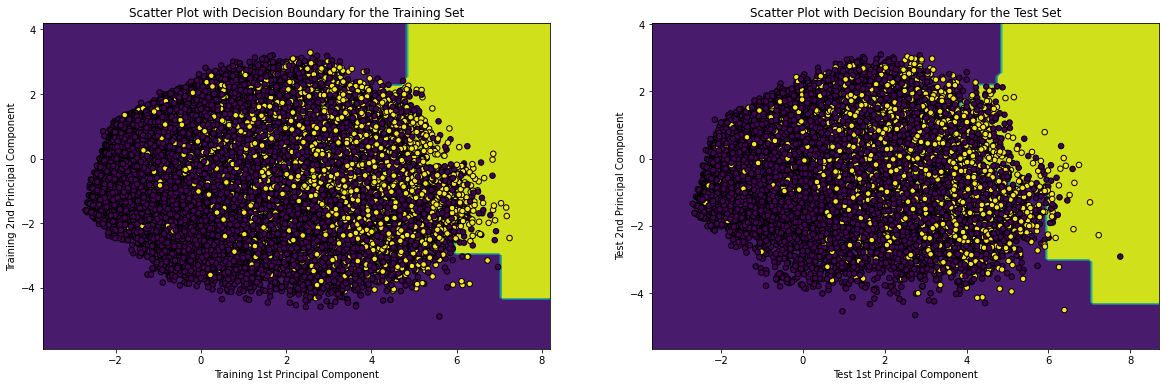

In [95]:
# Fitting the model with PCA components to do the plot:
clf_adaboost_PCA = clf_adaboost.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_adaboost_PCA, X_train_pca, X_test_pca, y_train, y_test)

In the plot it seems that there is not overfitting but is not 100% clear. So let's confirm it with the train evaluation.

In [96]:
evaluation(cm_adaboost_train)

Accuracy :  0.8660517187007253
Precision :  0.5592668907927557
Sensitivity (Recall) :  0.1823743678608056
Specificity :  0.976732868830403
F1 score :  0.27505466958237773


The train evaluation tell us that there is no overfitting. There metric scores are very similar in train and test what means that the model fits well to new data.  So let's continue proving other classfiers.

# Gradient Boosting

Let's fit a Gradient Boosting classifier with the best parameters found by the Grid Search and with F1 as scoring to maximize Precision and Recall:

In [97]:
params_gboost = {
             'n_estimators': [50, 100, 250],
             'max_depth': [3, 5],
             'learning_rate':[0.01, 0.1]
}
model_gboost = GridSearchCV(
    GradientBoostingClassifier(subsample=0.25),
    scoring='f1', param_grid=params_gboost,
    cv=3,
    verbose=10,
    n_jobs=-1
)

model_gboost.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(subsample=0.25),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100, 250]},
             scoring='f1', verbose=10)

In [98]:
#We print the best params
best_params_gboost = model_gboost.best_params_
model_gboost.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [99]:
clf_gboost = GradientBoostingClassifier(**best_params_gboost) 
clf_gboost.fit(X_train, y_train)

GradientBoostingClassifier()

Confusion matrix to evaluate:

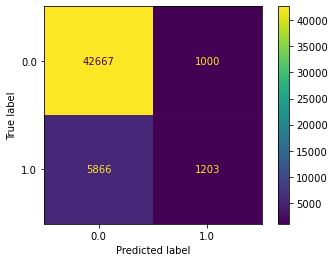

In [100]:
cm_gboost = confusion_matrix(y_test, clf_gboost.predict(X_test))
cm_gboost_train = confusion_matrix(y_train, clf_gboost.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, clf_gboost.predict(X_test))

In [101]:
evaluation(cm_gboost)

Accuracy :  0.864672027751498
Precision :  0.5460735360871539
Sensitivity (Recall) :  0.17017965766020654
Specificity :  0.9770994114548744
F1 score :  0.2594909404659189


The metrics are not bad at all, they are very similar to the Adaboost classifier, but we need a higher Recall.

Let's plot the decision boundary:

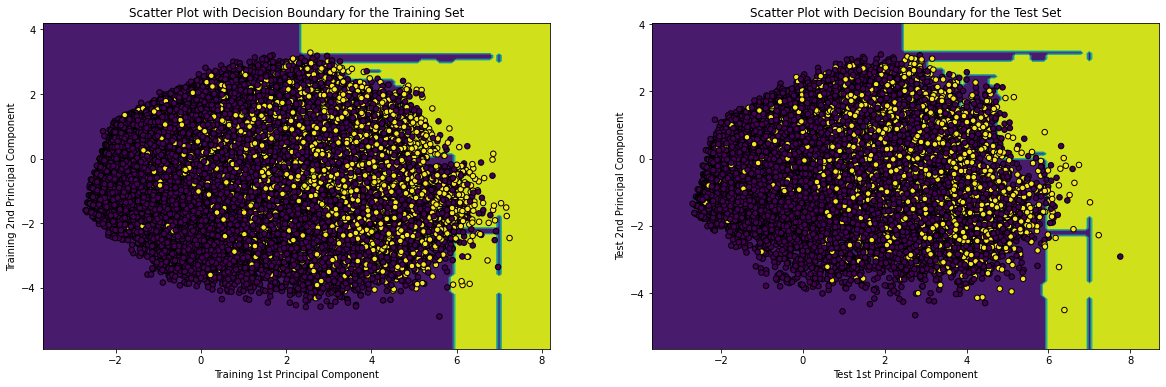

In [102]:
# Fitting the model with PCA components to do the plot:
clf_gboost_PCA = clf_gboost.fit(X_train_pca, y_train)
plot_decision_boundaries2D(clf_gboost_PCA, X_train_pca, X_test_pca, y_train, y_test)

In the plot we cannot clearly see how the model is overfitted, let's compare the train metrics with the test to confirm it:

In [103]:
evaluation(cm_gboost_train)

Accuracy :  0.8673476426994638
Precision :  0.5792241177845291
Sensitivity (Recall) :  0.1753014817696361
Specificity :  0.9793836271304825
F1 score :  0.2691461924799783


There is not a big difference between the training and the test scores, what means there is not overfitting. Let's fit the last classifier method.

# Support Vector Machine classifier

We have been proving to fit a SVM classifier with Grid Search optimizing F1 to obtain the best hyperparameters, but it has been imposible. We have been waiting 1 day with the run of this classifier and it hasn't already finished. We also have tried to fit it without parameters and the fit continue being very slow. That is because the complexity of the algorithm's training is highly dependent on the size of the dataset and our dataset has more than 200000 training observations. So, SVM does not work well with large datasets.

# UNDER SAMPLING

We have seen how applying Grid Search cross-validation with F1 as scoring trying to maximize our Precision and Recall, has increased the metrics scores in the majority of the models but not as much as we need. So, as we continue having poor results, it is time to resample our data. In this case the technique used will be UNDER SAMPLING to reduce our majority class (class 0 = non-diabetic patients). But the idea is not to balance our classes and take the same observations from both (50-50 balance); the idea is to reduce few observations of the majority class to obtain better Recall and Precision results in our classifier models and to continue with a realistic data in which class 0 is the majority class by a big difference. 

In [104]:
# We under sample only in the training data
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.38)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Non-under sampled training dataset shape %s' % Counter(y_train))
print('Under sampled training dataset shape %s' % Counter(y_train_rus))

Non-under sampled training dataset shape Counter({0.0: 174667, 1.0: 28277})
Under sampled training dataset shape Counter({0.0: 74413, 1.0: 28277})


0.0    0.860666
1.0    0.139334
Name: Diabetes_binary, dtype: float64


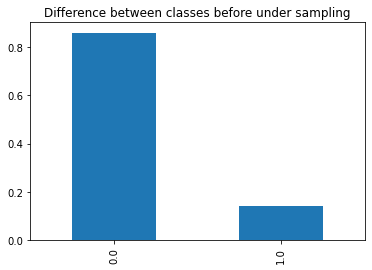

In [105]:
plt.title('Difference between classes before under sampling')
y_train.value_counts(normalize=True).plot(kind='bar')
print(y_train.value_counts(normalize=True))

0.0    0.724637
1.0    0.275363
Name: Diabetes_binary, dtype: float64


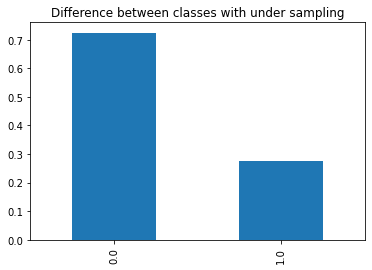

In [106]:
plt.title('Difference between classes with under sampling')
y_train_rus.value_counts(normalize=True).plot(kind='bar')
print(y_train_rus.value_counts(normalize=True))

We apply the under sampling only in the training data, because we modify it to improve the training of the model to obtain better results. So, we cannot modify the test sample because it simulates a real set of patients in which we need to predict its value (0 or 1, non-diabetic or diabetic) to classify. 

# Random Forest classifier with under sampling

Let's fit a random classifier model with the resampled data to compare it with the model fitted without resampling in order to see if our suppositions about the improve of the metrics (f1, recall, precision) are true or not. Let's try with the Random Forest model for example:

In [107]:
clf_rf_rus = RandomForestClassifier(**best_params_rf) 
clf_rf_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=7, min_samples_leaf=0.001, n_estimators=50)

Confusion matrix to evaluate:

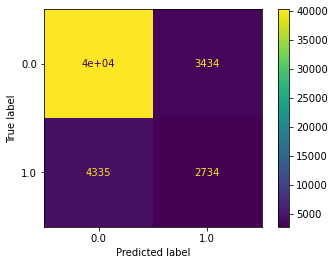

In [108]:
cm_rf_rus = confusion_matrix(y_test, clf_rf_rus.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_rf_rus.predict(X_test))

In [109]:
print("Evaluation of the Confusion matrix with the under sample applied: \n")
evaluation(cm_rf_rus)

print("\nEvaluation of the Confusion matrix without the under sample: \n")
evaluation(cm_rf)

Evaluation of the Confusion matrix with the under sample applied: 

Accuracy :  0.8468740145064648
Precision :  0.44325551232166016
Sensitivity (Recall) :  0.38675908898005373
Specificity :  0.9213593789360387
F1 score :  0.41308453577094506

Evaluation of the Confusion matrix without the under sample: 

Accuracy :  0.8626024913276569
Precision :  0.6376404494382022
Sensitivity (Recall) :  0.032112038477861087
Specificity :  0.9970458240776788
F1 score :  0.061144781144781155


We observe how after under sampling the training data, the model has increased its F1 score value if we compare it with the Random Forest results without under sampling, what means that under sampling works. Let's apply it to a better classifier.

# FINAL MODEL SELECTION

To select the final classifier to then apply under sampling, we need to fix some requirements:

    1- The first requirement is to have an F1 score higher than 0.25 before under sampling (logistic regression, decision 
    tree, hard voting and random forest discarded)
    
    2- The second requirement is to select a model without overfitting (KNN, soft voting and bagging
    discarded)
    
    3- The third requirement is that when we maximize F1, Accuracy and Specificity scores are not decreased a lot (NB    
    Gaussian discarded)
 
So we conclude that the only valid option is to pick Adaboost or Gradient Boosting (the unique classifiers that follows the three requirements) as the final classifier to then apply the under sample. As we are trying to maximize the Recall and F1 score (reduce the True Negative patients) and Adaboost has better Recall and F1 than Gradient Boosting, we will pick Adaboost.

# Adaboost classifier with under sampling

In [110]:
clf_adaboost_rus = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(**best_params_tree),
    **best_params_adaboost) 

clf_adaboost_rus.fit(X_train_rus, y_train_rus)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         max_features='auto',
                                                         min_samples_leaf=0.001),
                   learning_rate=0.1, n_estimators=500)

Let's plot confusion matrix to evaluate the classifier:

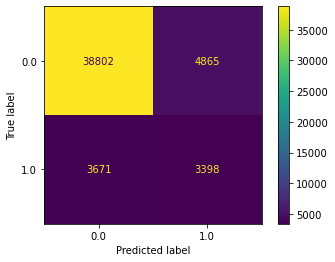

In [111]:
preds_adaboost_sampling = clf_adaboost_rus.predict(X_test)
preds_adaboost_sampling_train = clf_adaboost_rus.predict(X_train)
cm_adaboost_rus = confusion_matrix(y_test, preds_adaboost_sampling)
cm_adaboost_rus_train = confusion_matrix(y_train, preds_adaboost_sampling_train)
ConfusionMatrixDisplay.from_predictions(y_test, preds_adaboost_sampling)

In [112]:
print("Evaluation of the Confusion Matrix with the under sample applied: \n")
evaluation(cm_adaboost_rus)

print("\nEvaluation of the Confusion Matrix without the under sample: \n")
evaluation(cm_adaboost)

Evaluation of the Confusion Matrix with the under sample applied: 

Accuracy :  0.8317565436770735
Precision :  0.41123078784944933
Sensitivity (Recall) :  0.4806903380959117
Specificity :  0.888588636727964
F1 score :  0.44325593529872165

Evaluation of the Confusion Matrix without the under sample: 

Accuracy :  0.8637850835698517
Precision :  0.5331932773109244
Sensitivity (Recall) :  0.1795161974819635
Specificity :  0.9745574461263654
F1 score :  0.26859985183617313


We have been so aggressive in the under sampling because our main objective was to reduce the number of False Negative patients. False Negative patient means that we are diagnosing a patient as non-diabetic when he/she is suffering diabetes. So, we cannot permit having a lot of failures here because the error can cause the death. On the other hand, we have tried to not reduce the other good quality metrics we already have such as Specificity and Accuracy. We also don’t want that by classifying better class 1 (minority class), cause a bad classification of class 0 (majority class). Moreover, we also want to maintain the big difference of observations between class 0 and class 1 shown in the training data. In the results we can observe how all our objectives have been fulfilled; we have improved a lot the recall (from 0.18 to 0.46), we have balanced the error between class 0 and class 1 (similar number of False Negatives and False Positives), accuracy and specificity have not been highly decreased and we still having a big proportion of class 0 observations predicted in comparison to class 1 observations predicted.

In [113]:
predicted_class_1 = cm_adaboost_rus[0,1] + cm_adaboost_rus[1,1] 
predicted_class_0 = cm_adaboost_rus[0,0] + cm_adaboost_rus[1,0] 
print("Number of predicted patients from class 1 (diabetic)", predicted_class_1)
print("Number of predicted patients from class 0 (non-diabetic)", predicted_class_0)

Number of predicted patients from class 1 (diabetic) 8263
Number of predicted patients from class 0 (non-diabetic) 42473


We show that the big difference between the majority class (class 0) and the the minority class is mantained.

Let's confirm there is no overfitting with the train metrics:

In [114]:
evaluation(cm_adaboost_rus_train)

Accuracy :  0.8554921554714601
Precision :  0.4840696686491079
Sensitivity (Recall) :  0.5641687590621353
Specificity :  0.9026547659260192
F1 score :  0.5210589061453791


The metrics are so similar in train and test so we conclude there is not overfitting

# CONCLUSIONS

We have been following a process to obtain the more realistic and better results by proving all the classifiers trying to maximize the F1 score in the Grid Search and doing a controlled (not balancing 50-50) under sample ONLY in the training data. But, in order to confirm all our suppositions, let's prove what will happen if we balance the data 50-50. We will use the Adaboost classifier which is the classifier model that better fits with our problem.

In [115]:
# We under sample only in the training data, but in this case 50-50
rus_50 = RandomUnderSampler(random_state=42, sampling_strategy=1) #sampling strategy set to 1
X_train_rus_50, y_train_rus_50 = rus_50.fit_resample(X_train, y_train)
print('Non-resampled training dataset shape %s' % Counter(y_train))
print('Resampled training dataset shape %s' % Counter(y_train_rus_50))

Non-resampled training dataset shape Counter({0.0: 174667, 1.0: 28277})
Resampled training dataset shape Counter({0.0: 28277, 1.0: 28277})


In [116]:
clf_adaboost_rus_50 = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(**best_params_tree),
    **best_params_adaboost
)
clf_adaboost_rus_50.fit(X_train_rus_50, y_train_rus_50)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         max_features='auto',
                                                         min_samples_leaf=0.001),
                   learning_rate=0.1, n_estimators=500)

Let's plot the Confusion matrix to evaluate the classifier

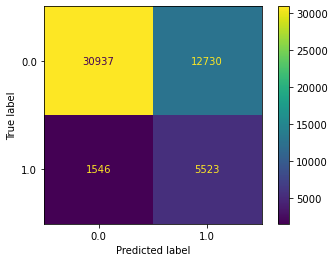

In [117]:
cm_adaboost_rus_50 = confusion_matrix(y_test, clf_adaboost_rus_50.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_test, clf_adaboost_rus_50.predict(X_test))

In [118]:
evaluation(cm_adaboost_rus_50)

Accuracy :  0.7186218858404289
Precision :  0.3025803977428368
Sensitivity (Recall) :  0.7812986278115717
Specificity :  0.708475507820551
F1 score :  0.43622146749861784


We can observe how it is true that the Recall has increased a lot (because the number of True Negative patients has been reduced) and now the model does not misclassify patients from class 1 as bad as it does without a 50-50 balance, but other metrics have been worsened. For example, Accuracy Specificity and the most significant, Precision have been reduced a lot, what means that now the model does not classify well patients from class 0. The Accuracy is lower because the majority class (0) does not classify well. So, we conclude that yes, we know this is an option if the only thing we want is to maximize the Recall and improve the class 1 classification, but we think that is not a good way to do it because the cost we have to pay with the Specificity, Accuracy and Precision is very high. What we have tried to compute in all our project is to maximize the lower value metrics without minimizing a lot the good quality metrics we already have as Accuracy or Specificity.  

In [119]:
predicted_class_1_50 = cm_adaboost_rus_50[0,1] + cm_adaboost_rus_50[1,1] 
predicted_class_0_50 = cm_adaboost_rus_50[0,0] + cm_adaboost_rus_50[1,0]
print("Number of predicted patients from class 1 (diabetic)", predicted_class_1_50)
print("Number of predicted patients from class 0 (non-diabetic)", predicted_class_0_50)

Number of predicted patients from class 1 (diabetic) 18253
Number of predicted patients from class 0 (non-diabetic) 32483


In [120]:
predictions_50 = clf_adaboost_rus_50.predict(X_test)

#Create the Data Frame
df_predictions=pd.DataFrame(
    data=np.array([predictions_50, preds_adaboost_sampling]).T,
    columns=['Predictions 50-50', 'Predictions under sampling']
)

<AxesSubplot:title={'center':'Predictions with 50-50 balance'}>

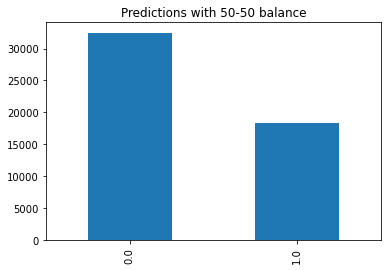

In [121]:
plt. title("Predictions with 50-50 balance")
df_predictions['Predictions 50-50'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Predictions with under sampling'}>

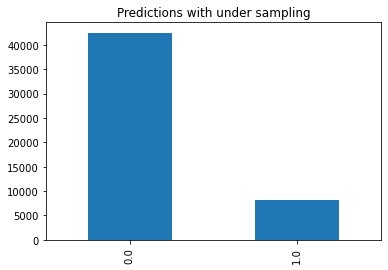

In [122]:
plt. title("Predictions with under sampling")
df_predictions['Predictions under sampling'].value_counts().plot(kind='bar')

Another mistake we find by balancing 50-50 is that in the predictions we do not see reflected what the training data explains that there is a majority class (0) with a big difference of observations from the minority class (1). In the 50-50 balanced data predictions, we have more predicted observations from class 0 than from class 1, but the big difference shown in the training data is not represented. This means we will not have a realistic model that explains well what the training data show us if we balance 50-50. Otherwise with the under sampling predictions we will continue having an imbalanced data as in training and as in reality. The barplots show what we have explained.